<a href="https://colab.research.google.com/github/naveenkumark1/EIP4/blob/master/1stDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First DNN Code 

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Importing all the required libraries 

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Print one of the entry in the data set loaded above 

(60000, 28, 28)


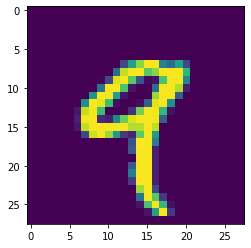

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])  # By changing this number different values in the data set will be displayed below

Divide the data in to training and testing data set 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
##### CODE TO LOOK AT THE VALUES OF THE numbers - To be done 

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 15s 248us/step - loss: 0.1934 - acc: 0.9440
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0668 - acc: 0.9802
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0493 - acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0396 - acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0321 - acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0261 - acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0204 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0164 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0138 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.08822343208297462, 0.9822]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[2.10939175e-21 4.27979008e-21 1.12998119e-13 1.10660112e-08
  6.69490867e-24 3.14258322e-17 4.52739210e-32 1.00000000e+00
  1.71492703e-13 3.32389904e-13]
 [6.49717734e-16 1.87672846e-11 1.00000000e+00 1.16101425e-11
  9.22335973e-25 8.28918023e-17 1.09916707e-08 5.82832012e-24
  1.26779961e-13 2.59310472e-19]
 [1.49503104e-10 9.99976277e-01 1.92085681e-05 2.70780259e-10
  2.15392129e-06 6.23304075e-10 6.44298850e-11 6.46668923e-07
  1.76549952e-06 7.20051319e-12]
 [1.00000000e+00 5.34452612e-19 2.38759856e-09 1.81982809e-14
  7.11253059e-20 8.59568899e-14 2.82582118e-08 2.42042042e-12
  1.38295451e-12 1.06220013e-12]
 [9.00613270e-14 1.01305595e-17 2.90712810e-12 5.23299286e-13
  9.99998808e-01 1.61438772e-17 1.81813711e-13 4.08642044e-12
  8.73591893e-11 1.23656810e-06]
 [1.75139796e-13 9.99908447e-01 5.48716571e-07 1.32976451e-11
  1.67116343e-06 4.98909724e-13 3.12271639e-13 8.45159302e-05
  4.71058047e-06 5.69782069e-11]
 [1.18052250e-18 9.90279432e-14 1.50575025e-10 1.42837538e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored

# Assignment : Using CNN to get 99%+ by changign the layers architecture 

Importing the required Libraries 

In [0]:
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Dropout

In [22]:
modelz = Sequential()

modelz.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26*26*32
modelz.add(Convolution2D(filters=64,kernel_size=3, activation='relu')) # 24*24*64
modelz.add(Convolution2D(filters=128,kernel_size=3, activation='relu')) # 22*22*128


modelz.add(MaxPooling2D(pool_size=(2,2))) # 11*11*128

modelz.add(Convolution2D(filters=32,kernel_size=(1,1), activation='relu')) # 11*11*32
modelz.add(Convolution2D(filters=64,kernel_size=(3,3), activation='relu')) # 9*9*64

modelz.add(Convolution2D(filters=10,kernel_size=(9,9))) # 1*1*10

modelz.add(Flatten())
modelz.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Printing Model Summary 
modelz.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)         

In [24]:
# Model Fit 
modelz.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
modelz.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)
score = modelz.evaluate(X_test, Y_test, verbose=0)

Epoch 1/15
60000/60000 [==============================] - 13s 225us/step - loss: 0.1115 - acc: 0.9653
Epoch 2/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0413 - acc: 0.9871
Epoch 3/15
60000/60000 [==============================] - 13s 214us/step - loss: 0.0287 - acc: 0.9908
Epoch 4/15
60000/60000 [==============================] - 13s 215us/step - loss: 0.0211 - acc: 0.9931
Epoch 5/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0163 - acc: 0.9950
Epoch 6/15
60000/60000 [==============================] - 13s 214us/step - loss: 0.0127 - acc: 0.9961
Epoch 7/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0118 - acc: 0.9961
Epoch 8/15
60000/60000 [==============================] - 13s 215us/step - loss: 0.0081 - acc: 0.9975
Epoch 9/15
60000/60000 [==============================] - 13s 215us/step - loss: 0.0093 - acc: 0.9973
Epoch 10/15
60000/60000 [==============================] - 13s 214us/step - loss: 

In [25]:
# Final Score
print(score)

[0.05047165223093484, 0.9911]
